**Created Spectral Library**

In [32]:
ls

Leaf_Flower_Spectroscopy.ipynb  bb-_07763.sed
bb-_07750.sed                   bb-_07764.sed
bb-_07751.sed                   bb-_07765.sed
bb-_07752.sed                   bb-_07766.sed
bb-_07753.sed                   bb-_07767.sed
bb-_07754.sed                   bb-_07768.sed
bb-_07755.sed                   bb-_07769.sed
bb-_07756.sed                   bb-_07770.sed
bb-_07757.sed                   bb-_07771.sed
bb-_07758.sed                   bb-_07772.sed
bb-_07759.sed                   bb-_07773.sed
bb-_07760.sed                   spectral_library.csv
bb-_07761.sed                   spectral_library_metadata.csv
bb-_07762.sed


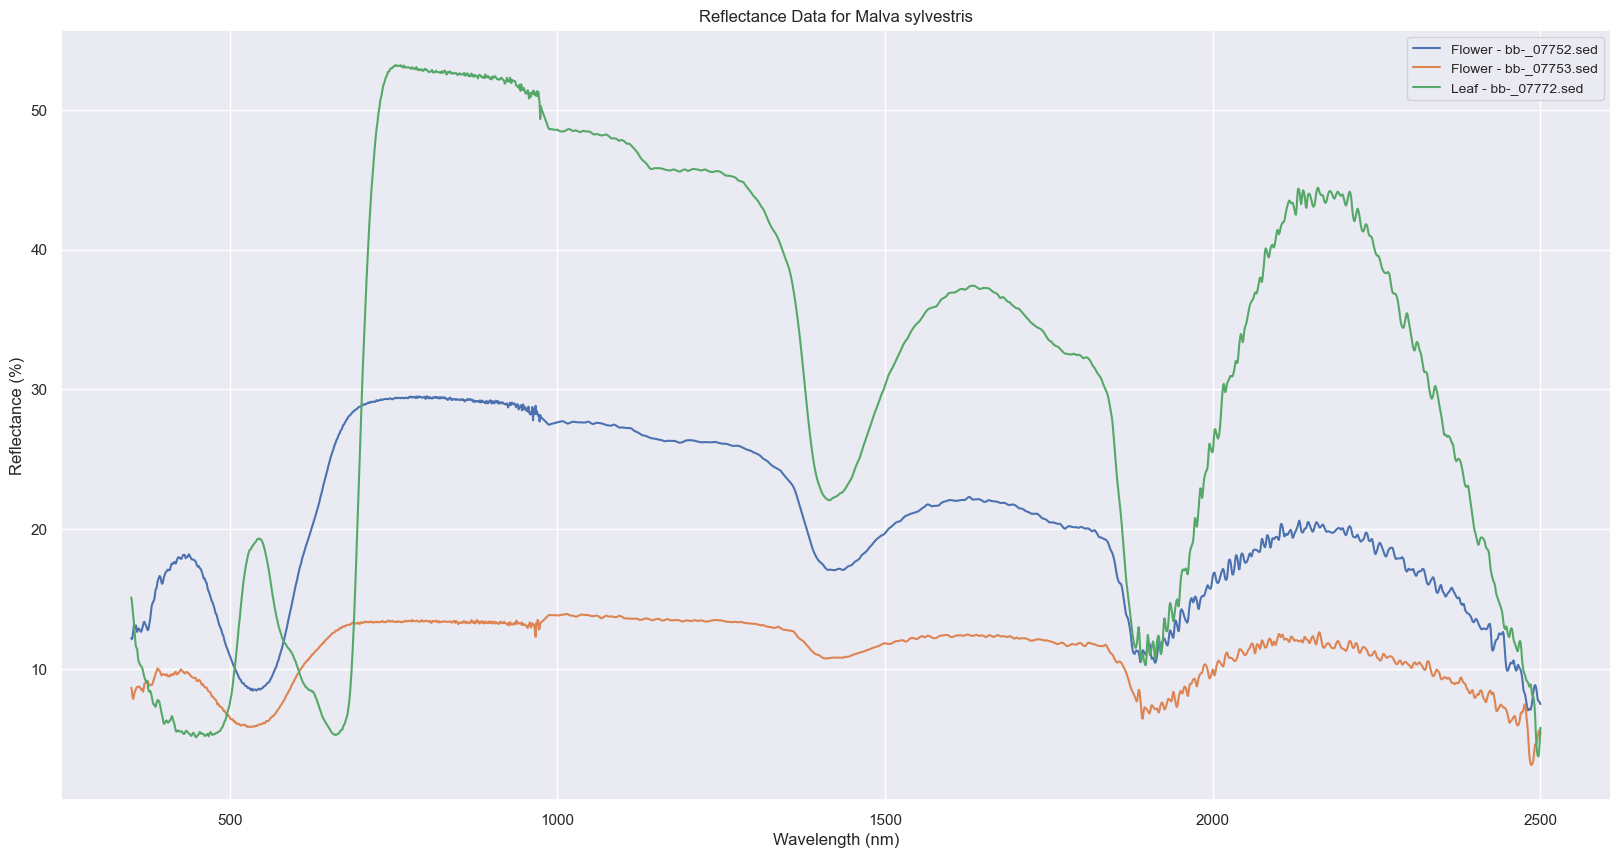

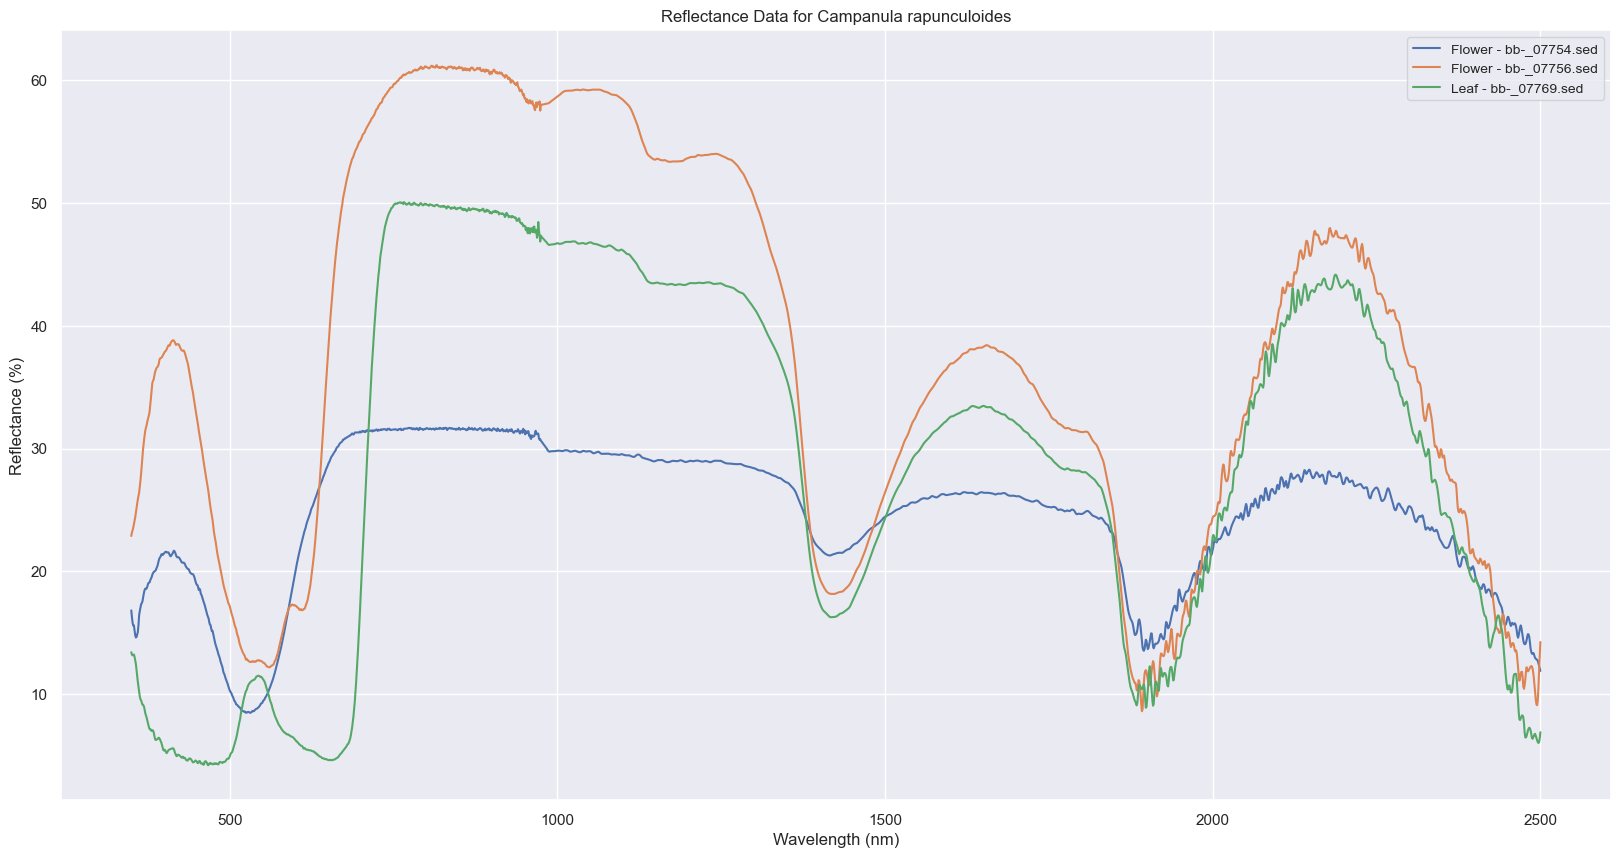

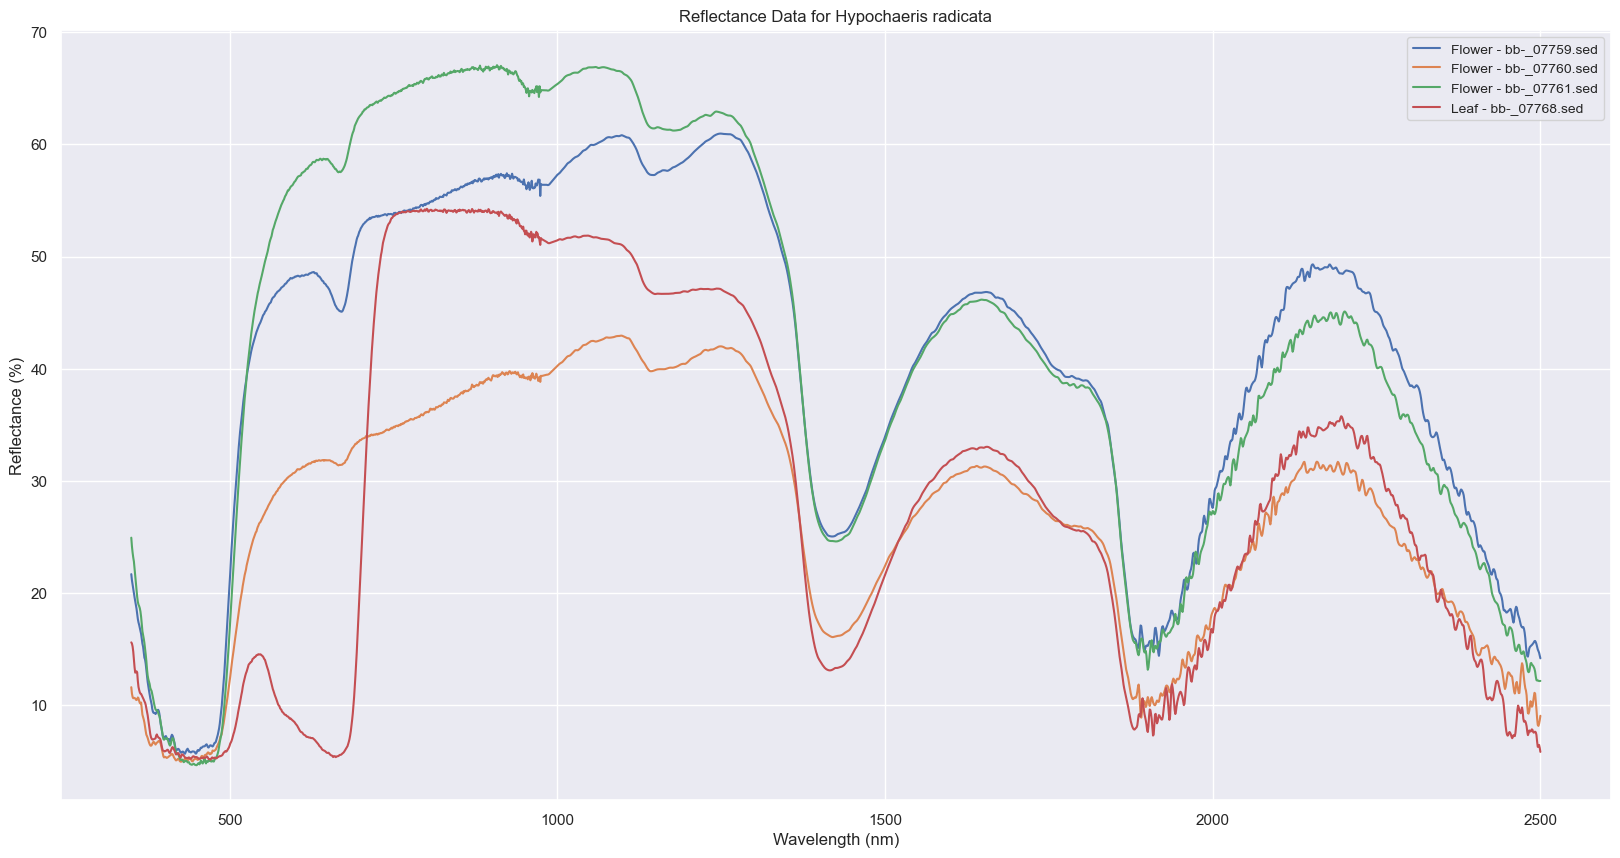

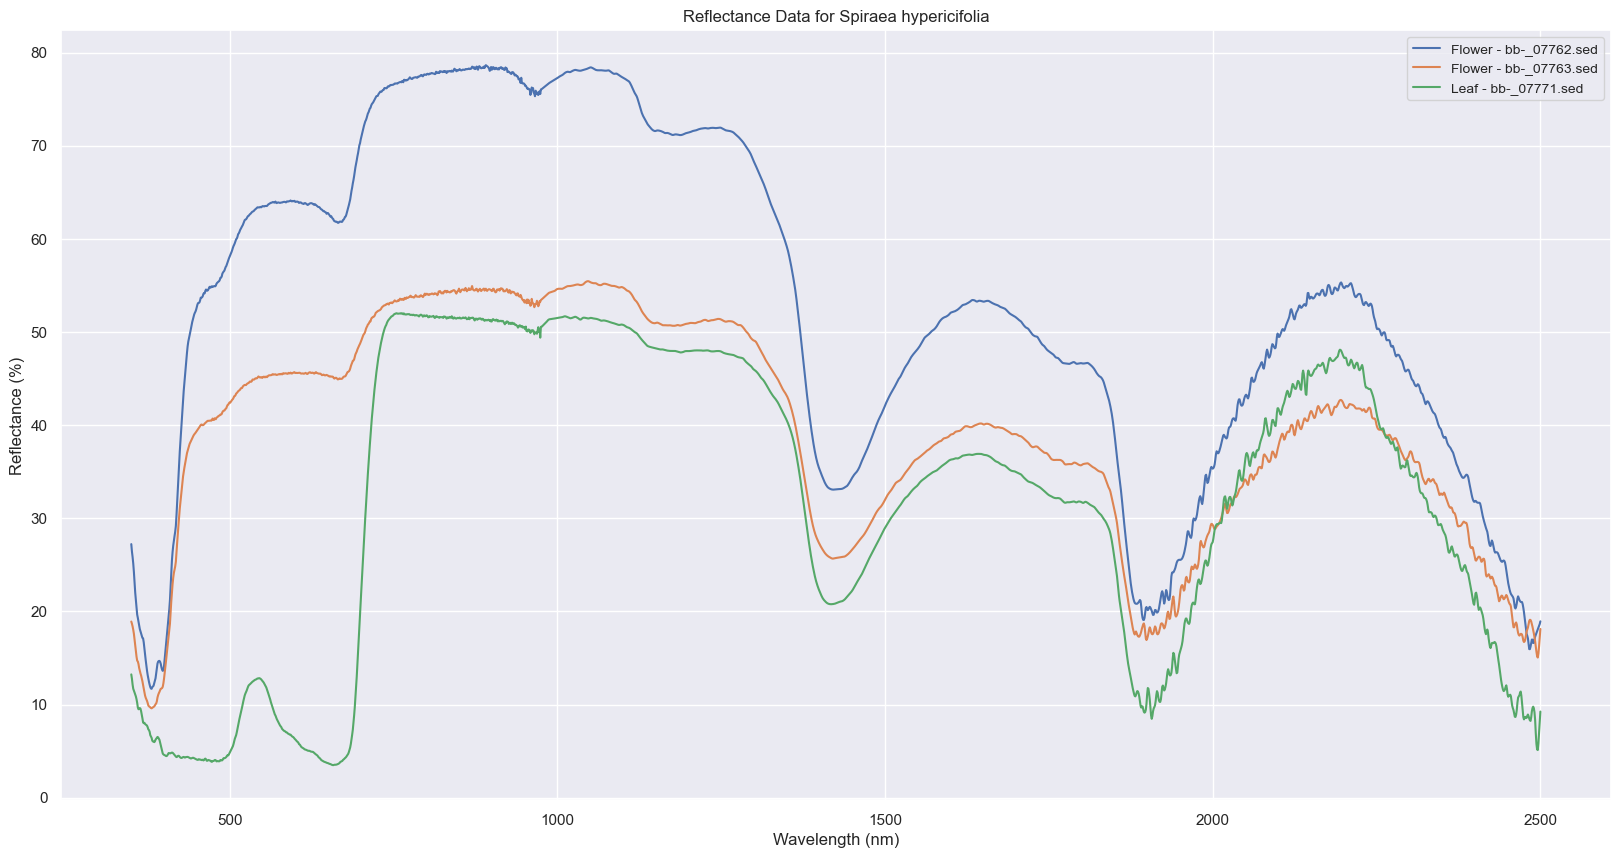

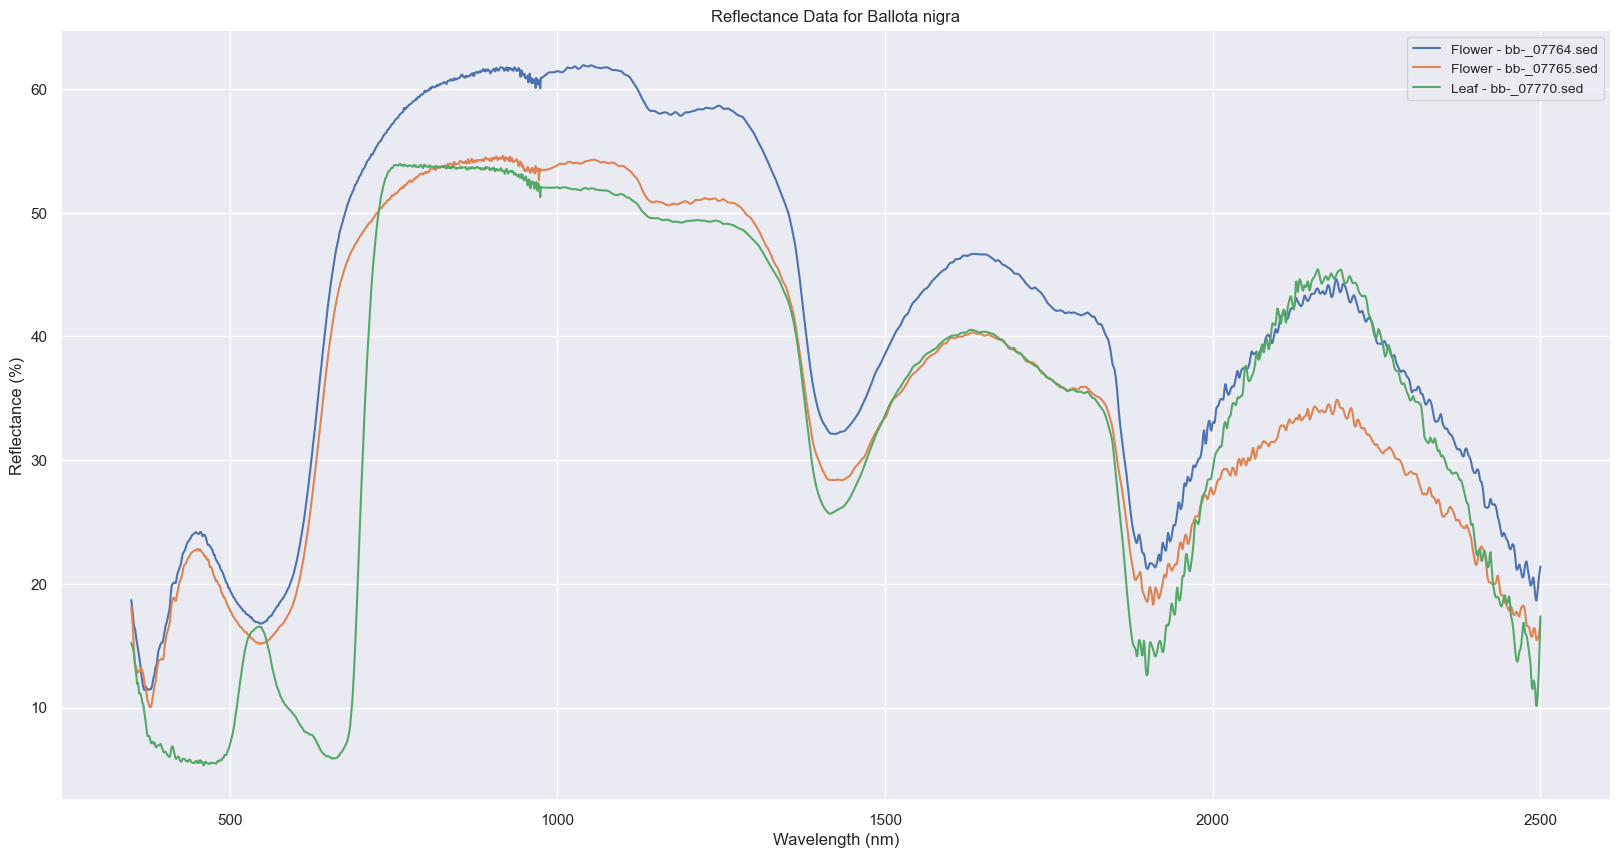

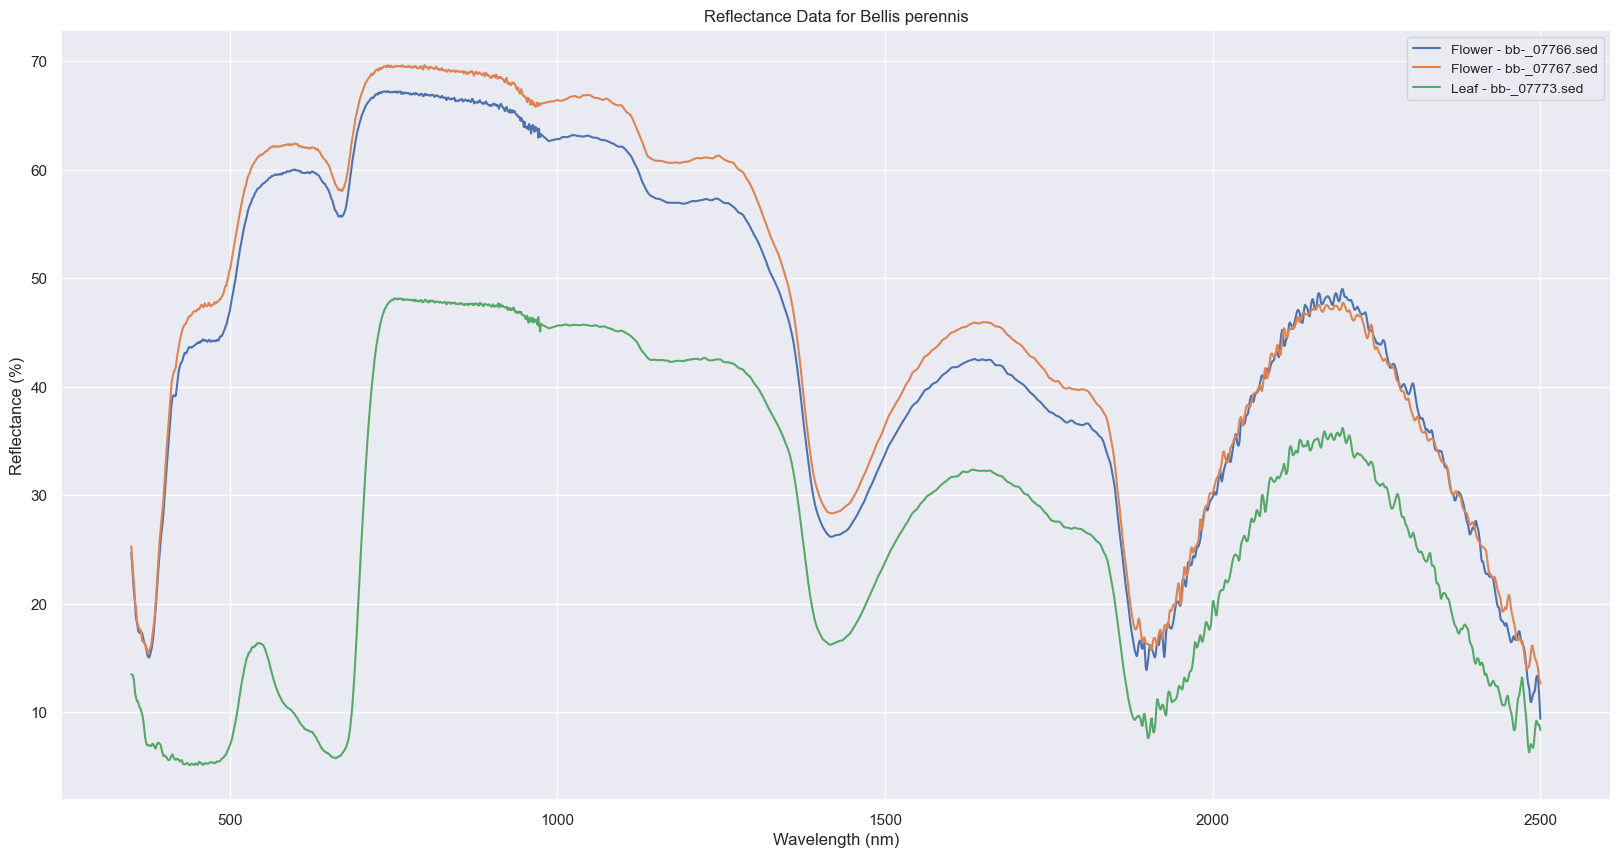

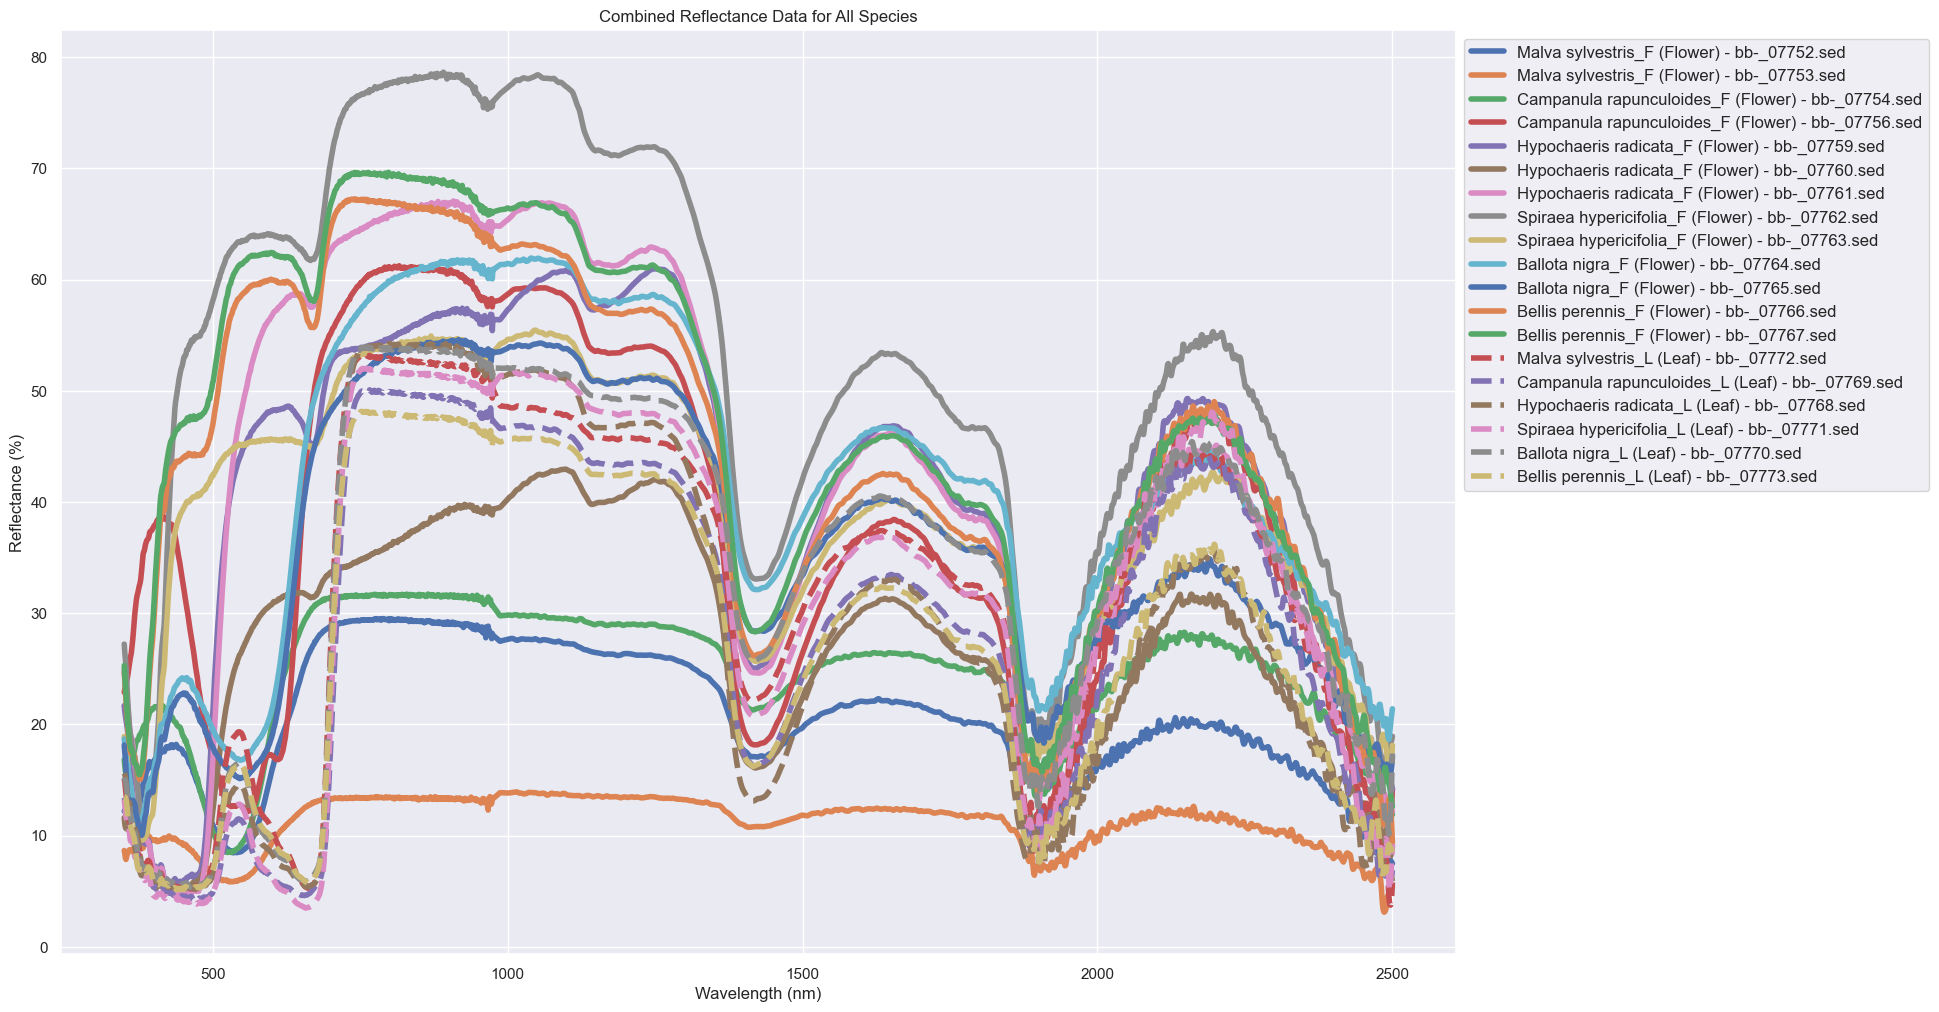

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of species names and corresponding files
species_mapping = {
    "Malva sylvestris_F": ["bb-_07752.sed", "bb-_07753.sed"],
    "Campanula rapunculoides_F": ["bb-_07754.sed", "bb-_07756.sed"],
    "Hypochaeris radicata_F": ["bb-_07759.sed", "bb-_07760.sed", "bb-_07761.sed"],
    "Spiraea hypericifolia_F": ["bb-_07762.sed", "bb-_07763.sed"],
    "Ballota nigra_F": ["bb-_07764.sed", "bb-_07765.sed"],
    "Bellis perennis_F": ["bb-_07766.sed", "bb-_07767.sed"],
    "Malva sylvestris_L": ["bb-_07772.sed"],
    "Campanula rapunculoides_L": ["bb-_07769.sed"],
    "Hypochaeris radicata_L": ["bb-_07768.sed"],
    "Spiraea hypericifolia_L": ["bb-_07771.sed"],
    "Ballota nigra_L": ["bb-_07770.sed"],
    "Bellis perennis_L": ["bb-_07773.sed"]
}

# Directory containing the .sed files
directory = '.'

# Function to read and parse the .sed file
def parse_sed_file(file_path, species, file_type):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data_section = False
    wavelengths = []
    reflectance = []
    
    for line in lines:
        if data_section:
            parts = line.split()
            if len(parts) == 4:
                wavelengths.append(float(parts[0]))
                reflectance.append(float(parts[3]))
        if line.startswith("Data:"):
            data_section = True
    
    metadata = {
        'Species': species,
        'FileType': file_type,
        'File': file_path  # Include the file path in metadata
    }
    
    df = pd.DataFrame({'Wavelength': wavelengths, 'Reflectance': reflectance})
    return df, metadata

# List to store spectral data and metadata
spectral_library = []

# Read data from all .sed files
for species, files in species_mapping.items():
    for file in files:
        file_path = os.path.join(directory, file)
        df, metadata = parse_sed_file(file_path, species, 'Flower' if species.endswith('_F') else 'Leaf')
        spectral_library.append((df, metadata))

# Concatenate all spectra and metadata into a single DataFrame
spectra = []
metadata_list = []

for df, meta in spectral_library:
    spectra.append(df)
    metadata_list.append(meta)

spectra_df = pd.concat(spectra, ignore_index=True)


metadata_df = pd.DataFrame(metadata_list)
metadata_df.to_csv('spectral_library_metadata.csv', index=False)
spectra_df.to_csv('spectral_library.csv', index=False)
# Plotting code for individual species
plotted_species = set()

for species in species_mapping.keys():
    base_species = species.split("_")[0]
    if base_species in plotted_species:
        continue

    flower_key = base_species + "_F"
    leaf_key = base_species + "_L"
    
    plt.figure(figsize=(20, 10))
    
    if flower_key in species_mapping:
        # Plot flower data
        for df, meta in spectral_library:
            if meta['Species'] == flower_key:
                plt.plot(df['Wavelength'], df['Reflectance'], label=f'Flower - {os.path.basename(meta["File"])}')
    
    if leaf_key in species_mapping:
        # Plot leaf data
        for df, meta in spectral_library:
            if meta['Species'] == leaf_key:
                plt.plot(df['Wavelength'], df['Reflectance'], label=f'Leaf - {os.path.basename(meta["File"])}')
    
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance (%)')
    plt.title(f'Reflectance Data for {base_species}')
    plt.legend(loc='best', fontsize='small')
    plt.grid(True)
    plt.show()
    
    plotted_species.add(base_species)

# Plotting code for all species in the same plot
plt.figure(figsize=(18, 12))

for species, files in species_mapping.items():
    for file in files:
        file_path = os.path.join(directory, file)
        df, meta = parse_sed_file(file_path, species, 'Flower' if species.endswith('_F') else 'Leaf')
        
        # Choose different line styles or colors for flowers and leaves
        if species.endswith('_F'):
            plt.plot(df['Wavelength'], df['Reflectance'], label=f'{species} (Flower) - {os.path.basename(meta["File"])}', linestyle='-', linewidth=4)
        else:
            plt.plot(df['Wavelength'], df['Reflectance'], label=f'{species} (Leaf) - {os.path.basename(meta["File"])}', linestyle='--', linewidth=4)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.title('Combined Reflectance Data for All Species')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')
plt.grid(True)
plt.show()


**Implemented both Kolmogorov-Smirnov (KS) test, Hierarchical method**

Mean Reflectance for Flower Spectra:
Wavelength                   350.0      351.0     352.0      353.0     354.0   \
Species                                                                         
Ballota nigra_F            18.41725  17.843550  17.24815  16.525000  15.67055   
Bellis perennis_F          24.98780  24.108300  23.18490  22.314350  21.53350   
Campanula rapunculoides_F  19.85420  19.722950  19.58315  19.578950  19.73815   
Hypochaeris radicata_F     19.41950  18.790033  18.37810  18.066567  17.82730   
Malva sylvestris_F         10.43540  10.267450  10.16030  10.273400  10.62815   
Spiraea hypericifolia_F    23.06485  22.551200  22.11130  21.580350  20.90495   

Wavelength                    355.0     356.0     357.0     358.0      359.0   \
Species                                                                         
Ballota nigra_F            15.183900  14.87070  14.60095  14.28255  13.993700   
Bellis perennis_F          20.740800  19.98530  19.29550  18.73325  18.

/var/folders/rc/x9x4x_ls02n4n2gzhnky2mp40000gn/T/ipykernel_67197/1636624131.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  flower_spectra = pd.concat([flower_spectra, df], ignore_index=True)
/var/folders/rc/x9x4x_ls02n4n2gzhnky2mp40000gn/T/ipykernel_67197/1636624131.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  leaf_spectra = pd.concat([leaf_spectra, df], ignore_index=True)


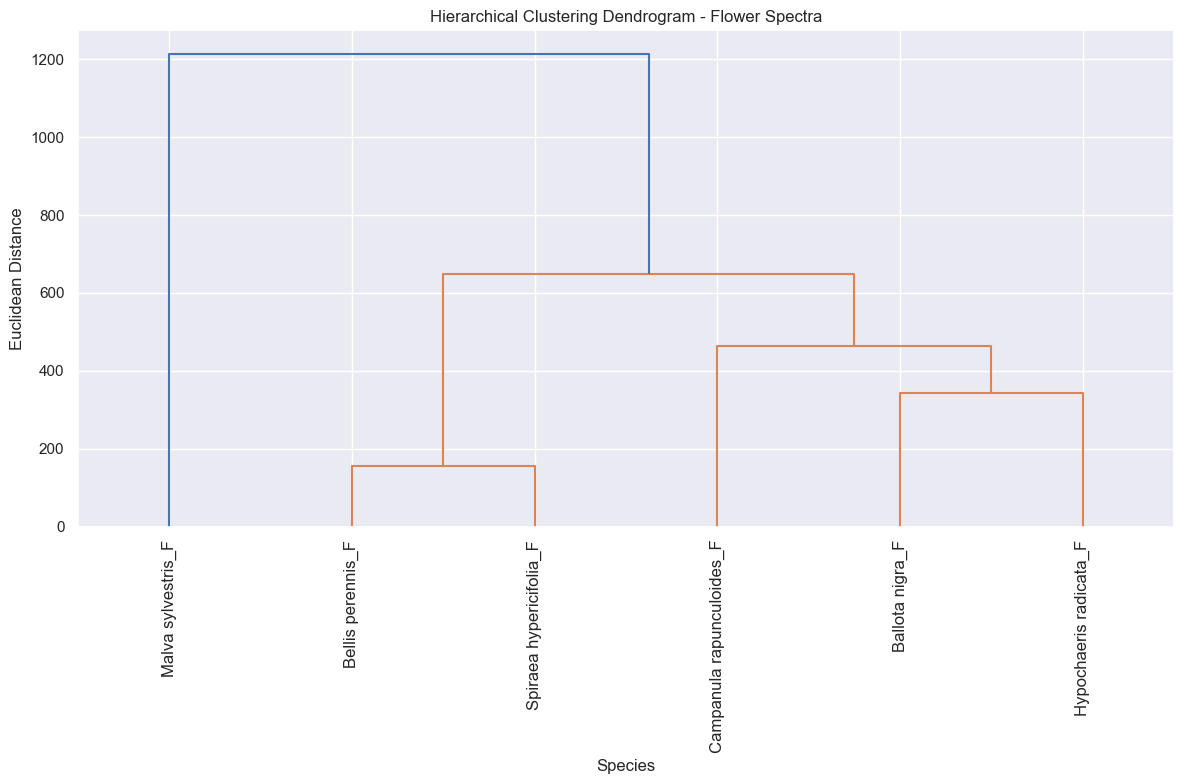

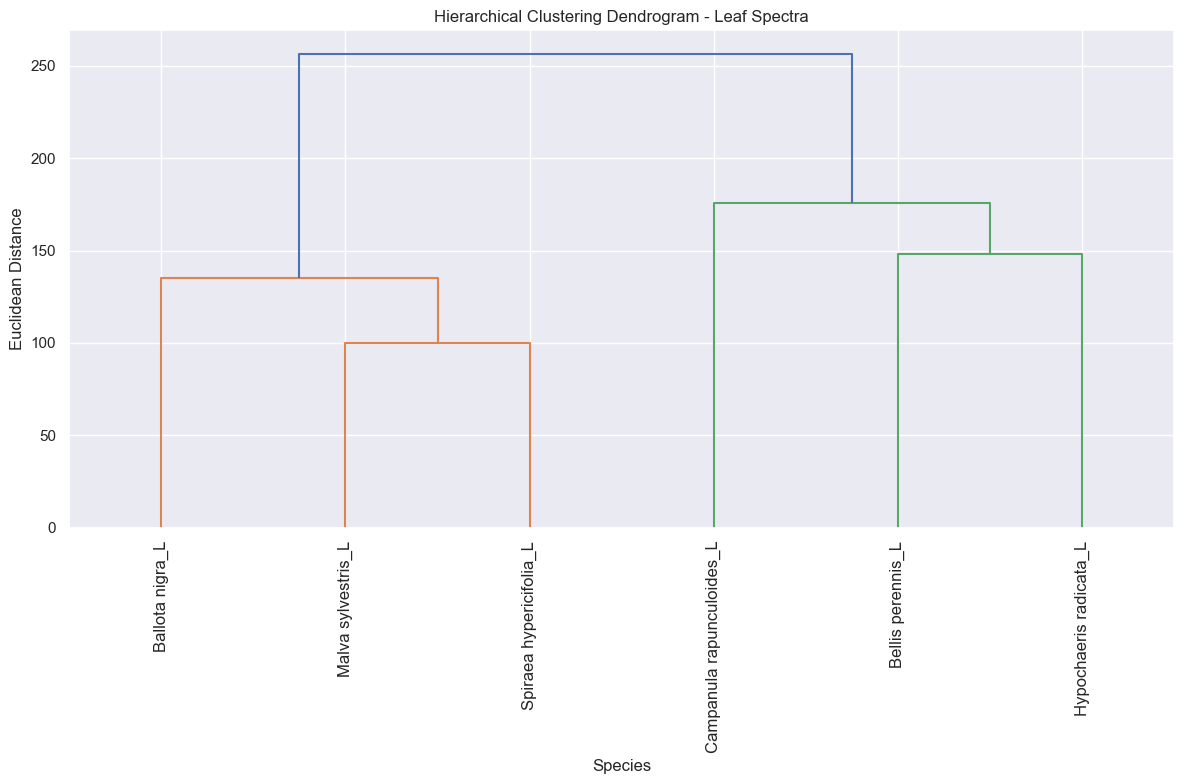


Kolmogorov-Smirnov Test Results for Flower Spectra:
Malva sylvestris_F vs Campanula rapunculoides_F: {'Statistical Value': 0.5762436076243608, 'P-Value': 0.0}
Malva sylvestris_F vs Hypochaeris radicata_F: {'Statistical Value': 0.6531845653184565, 'P-Value': 0.0}
Malva sylvestris_F vs Spiraea hypericifolia_F: {'Statistical Value': 0.8365876336587633, 'P-Value': 0.0}
Malva sylvestris_F vs Ballota nigra_F: {'Statistical Value': 0.7178056717805672, 'P-Value': 0.0}
Malva sylvestris_F vs Bellis perennis_F: {'Statistical Value': 0.8268247326824733, 'P-Value': 0.0}
Campanula rapunculoides_F vs Hypochaeris radicata_F: {'Statistical Value': 0.27808771114210445, 'P-Value': 3.482903553170557e-176}
Campanula rapunculoides_F vs Spiraea hypericifolia_F: {'Statistical Value': 0.504416550441655, 'P-Value': 0.0}
Campanula rapunculoides_F vs Ballota nigra_F: {'Statistical Value': 0.35936773593677357, 'P-Value': 3.6530215049831146e-247}
Campanula rapunculoides_F vs Bellis perennis_F: {'Statistical Value'

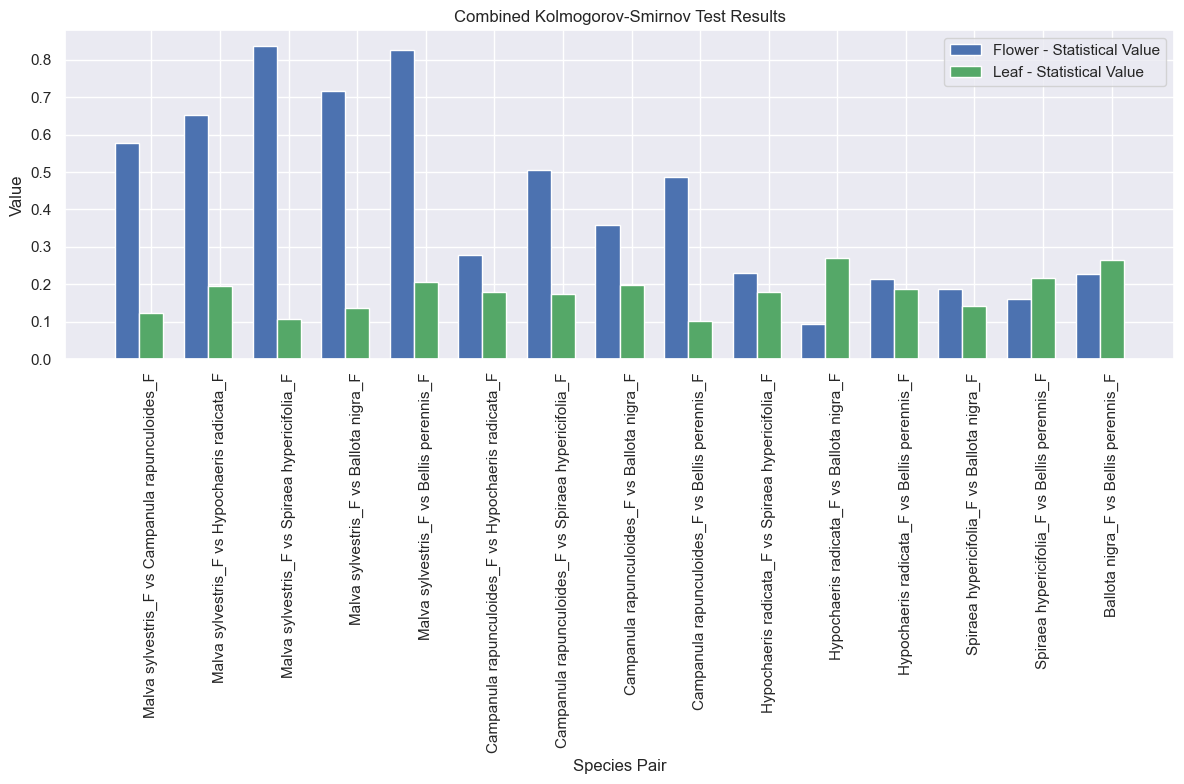

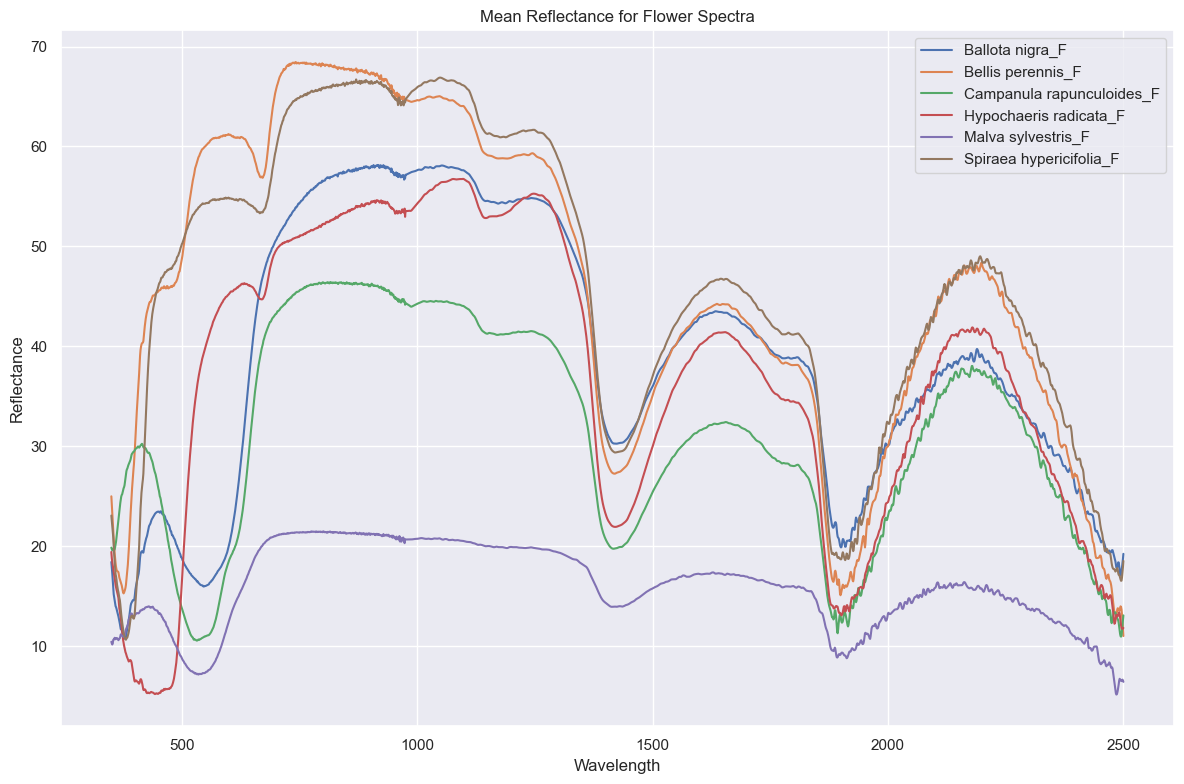

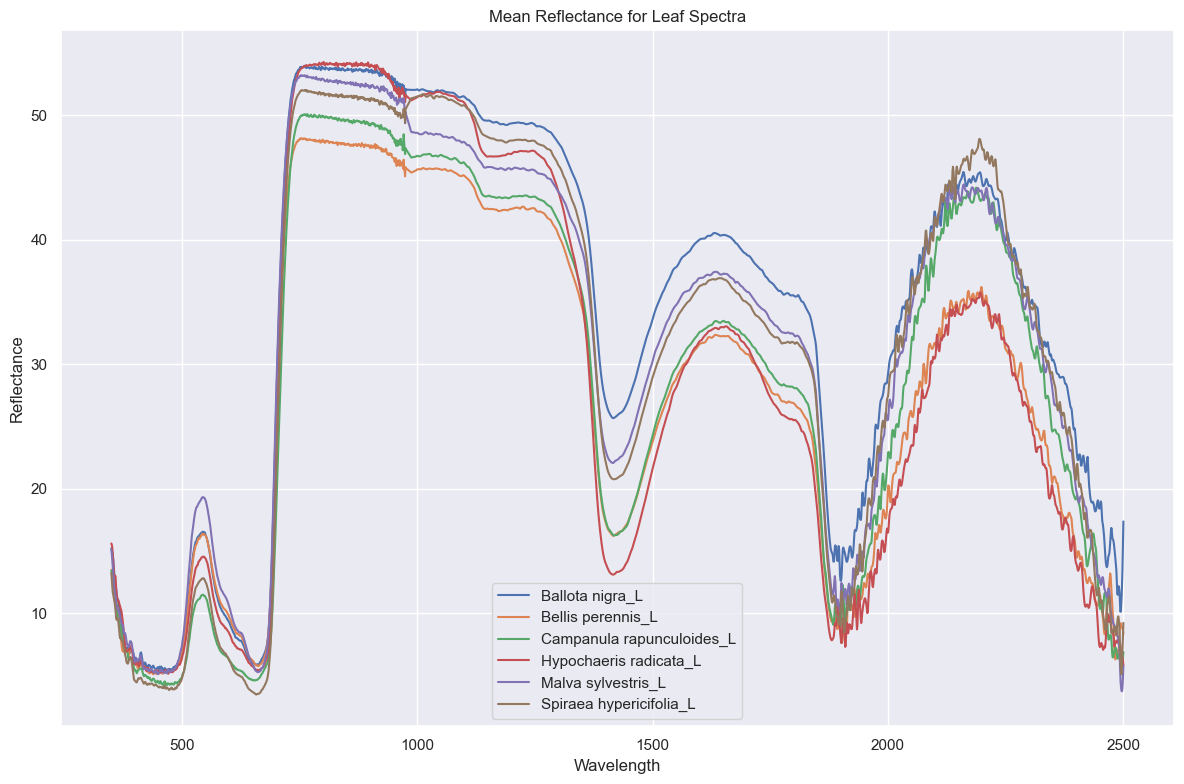

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# List of species names and corresponding files
species_mapping = {
    "Malva sylvestris_F": [ "bb-_07752.sed", "bb-_07753.sed"],
    "Campanula rapunculoides_F": ["bb-_07754.sed", "bb-_07756.sed"],
    "Hypochaeris radicata_F": ["bb-_07759.sed", "bb-_07760.sed", "bb-_07761.sed"],
    "Spiraea hypericifolia_F": ["bb-_07762.sed", "bb-_07763.sed"],
    "Ballota nigra_F": ["bb-_07764.sed", "bb-_07765.sed"],
    "Bellis perennis_F": ["bb-_07766.sed", "bb-_07767.sed"],
    "Malva sylvestris_L": ["bb-_07772.sed"],
    "Campanula rapunculoides_L": ["bb-_07769.sed"],
    "Hypochaeris radicata_L": ["bb-_07768.sed"],
    "Spiraea hypericifolia_L": ["bb-_07771.sed"],
    "Ballota nigra_L": ["bb-_07770.sed"],
    "Bellis perennis_L": ["bb-_07773.sed"]
}

# Directory containing the .sed files
directory = '.'

# Function to read and parse the .sed file
def parse_sed_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data_section = False
    wavelengths = []
    reflectance = []
    
    for line in lines:
        if data_section:
            parts = line.split()
            if len(parts) == 4:
                wavelengths.append(float(parts[0]))
                reflectance.append(float(parts[3]))
        if line.startswith("Data:"):
            data_section = True
    
    return pd.DataFrame({'Wavelength': wavelengths, 'Reflectance': reflectance})

# Dictionary to store data for each species
species_data = {species: [] for species in species_mapping}

# Read data from all .sed files
for species, files in species_mapping.items():
    for file in files:
        file_path = os.path.join(directory, file)
        df = parse_sed_file(file_path)
        df['Species'] = species
        species_data[species].append(df)

# Create empty DataFrames to store flower and leaf spectra
flower_spectra = pd.DataFrame(columns=['Species', 'Wavelength', 'Reflectance'])
leaf_spectra = pd.DataFrame(columns=['Species', 'Wavelength', 'Reflectance'])

# Populate flower and leaf spectra DataFrames
for species, data in species_data.items():
    for df in data:
        if species.endswith('_F'):
            flower_spectra = pd.concat([flower_spectra, df], ignore_index=True)
        elif species.endswith('_L'):
            leaf_spectra = pd.concat([leaf_spectra, df], ignore_index=True)

# Calculate mean reflectance for each species in flower and leaf spectra
flower_mean_reflectance = flower_spectra.groupby(['Species', 'Wavelength'])['Reflectance'].mean().unstack()
leaf_mean_reflectance = leaf_spectra.groupby(['Species', 'Wavelength'])['Reflectance'].mean().unstack()

print("Mean Reflectance for Flower Spectra:")
print(flower_mean_reflectance)

print("\nMean Reflectance for Leaf Spectra:")
print(leaf_mean_reflectance)

# Convert to numpy array for hierarchical clustering
flower_mean_array = flower_mean_reflectance.to_numpy()
leaf_mean_array = leaf_mean_reflectance.to_numpy()

# Perform hierarchical clustering using Euclidean distance
flower_cluster = linkage(flower_mean_array, metric='euclidean', method='average')
leaf_cluster = linkage(leaf_mean_array, metric='euclidean', method='average')

# Plot dendrogram for flower spectra clustering
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
dendrogram(flower_cluster, labels=flower_mean_reflectance.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram - Flower Spectra')
plt.xlabel('Species')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

# Plot dendrogram for leaf spectra clustering
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
dendrogram(leaf_cluster, labels=leaf_mean_reflectance.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram - Leaf Spectra')
plt.xlabel('Species')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

# Perform Kolmogorov-Smirnov test for flower and leaf spectra
def perform_ks_test(spectra_data):
    species = spectra_data['Species'].unique()
    ks_results = {}
    
    for i in range(len(species)):
        for j in range(i+1, len(species)):
            species1 = species[i]
            species2 = species[j]
            stat, p_value = ks_2samp(spectra_data[spectra_data['Species'] == species1]['Reflectance'],
                                     spectra_data[spectra_data['Species'] == species2]['Reflectance'])
            ks_results[f"{species1} vs {species2}"] = {'Statistical Value': stat, 'P-Value': p_value}
    
    return ks_results

# Perform Kolmogorov-Smirnov test for flower spectra
flower_ks_results = perform_ks_test(flower_spectra)
print("\nKolmogorov-Smirnov Test Results for Flower Spectra:")
for comparison, result in flower_ks_results.items():
    print(f"{comparison}: {result}")

# Perform Kolmogorov-Smirnov test for leaf spectra
leaf_ks_results = perform_ks_test(leaf_spectra)
print("\nKolmogorov-Smirnov Test Results for Leaf Spectra:")
for comparison, result in leaf_ks_results.items():
    print(f"{comparison}: {result}")

# Plot combined Statistical Value and P-Value for KS test
def plot_combined_ks_results(flower_ks_results, leaf_ks_results, title):
    plt.figure(figsize=(12, 8))
    
    # Extracting data for plotting
    flower_stats = [result['Statistical Value'] for result in flower_ks_results.values()]
    flower_p_values = [result['P-Value'] for result in flower_ks_results.values()]
    leaf_stats = [result['Statistical Value'] for result in leaf_ks_results.values()]
    leaf_p_values = [result['P-Value'] for result in leaf_ks_results.values()]
    
    # Number of comparisons
    num_comparisons = len(flower_stats)
    
    # Width of the bars
    bar_width = 0.35
    
    # Indices for the x-axis
    ind = np.arange(num_comparisons)
    
    # Plotting Statistical Values
    plt.bar(ind, flower_stats, bar_width, label='Flower - Statistical Value', color='b')
    plt.bar(ind + bar_width, leaf_stats, bar_width, label='Leaf - Statistical Value', color='g')
    
    plt.title(title)
    plt.xlabel('Species Pair')
    plt.ylabel('Value')
    plt.xticks(ind + bar_width, list(flower_ks_results.keys()), rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotting combined results for flower and leaf spectra
plot_combined_ks_results(flower_ks_results, leaf_ks_results, 'Combined Kolmogorov-Smirnov Test Results')

# Plot mean reflectance for flower spectra
plt.figure(figsize=(12, 8))
for species in flower_mean_reflectance.index:
    plt.plot(flower_mean_reflectance.columns, flower_mean_reflectance.loc[species], label=species)
plt.title('Mean Reflectance for Flower Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.legend()
plt.tight_layout()
plt.show()

# Plot mean reflectance for leaf spectra
plt.figure(figsize=(12, 8))
for species in leaf_mean_reflectance.index:
    plt.plot(leaf_mean_reflectance.columns, leaf_mean_reflectance.loc[species], label=species)
plt.title('Mean Reflectance for Leaf Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.legend()
plt.tight_layout()
plt.show()
